In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn as sk
from tensorflow import keras
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix
import random

# Working on binary classification using make_circles function from sklearn.datasets module

In [ ]:
from sklearn.datasets import make_circles
n_samples = 1000
noise = 0.03
X, y = make_circles(n_samples, shuffle = True, noise=noise, random_state=42) # It returns X and y.
print(X.shape)
print(y.shape)
print(type(X))

(1000, 2)
(1000,)
<class 'numpy.ndarray'>


In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

# Visualizing our data

In [ ]:
circles_df = pd.DataFrame({'x1':X[:,0], 'x2':X[:,1], 'Label':y}) # Using Dictionary.
circles_df

,x1,x2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


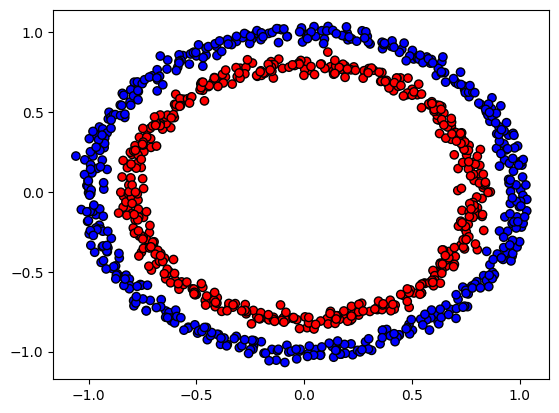

In [ ]:
# Using scatter plot to visualize our data
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'bwr', edgecolors = 'k')
# X[:, 0] → x-coordinates
# X[:, 1] → y-coordinates
# c=y → assigns a color to each point based on its label/class in y.
# If y contains:
# class labels (e.g., 0 and 1) → points with y=0 and y=1 will get different colors.
plt.show()

# Creating own colormap object of class ListedColormap in Matplotlib.

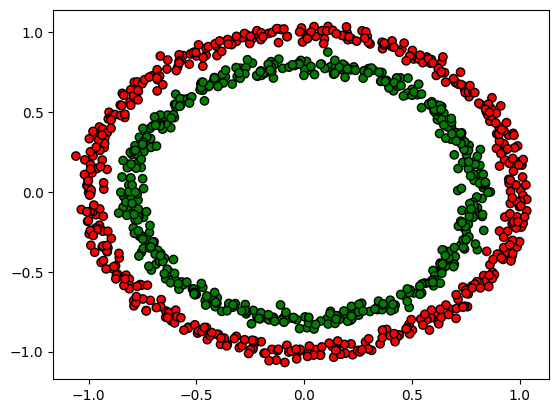

In [ ]:
import matplotlib.colors as mcolors

# Defining a list of colors
my_colors = ["red", "green"]

# Creating own ListedColormap object
my_cmap = mcolors.ListedColormap(my_colors, name = "my_colormap")

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = my_cmap, edgecolors = 'k')
plt.show()

In [ ]:
print(type(my_cmap))

<class 'matplotlib.colors.ListedColormap'>


# Input and Output Shapes

In [ ]:
# Checking the shape of features and labels in our dataset
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Checking the no of samples or the length of our dataset and labels
len(X), len(y)

(1000, 1000)

# Steps in Modeling

In [ ]:
# Creating a model for binary classification
tf.random.set_seed(42)

model_1 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(1)
])

# Compiling the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

# Summary of the model
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the model
model_1.fit(X, y, epochs = 5, verbose = 1)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4774 - loss: 5.2148
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4703 - loss: 1.9005 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4853 - loss: 0.7220 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4792 - loss: 0.7021
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4775 - loss: 0.6966 


# Improving our Model

# First of all, let's normalize our data (Data Preprocessing)

In [ ]:
# Let's divide our data to training and testing data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Normalizing our data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fitting the MinMaxScaler on training data
scaler.fit(X_train)

# Transforming using MinMaxScaler object i.e. scaler on both training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

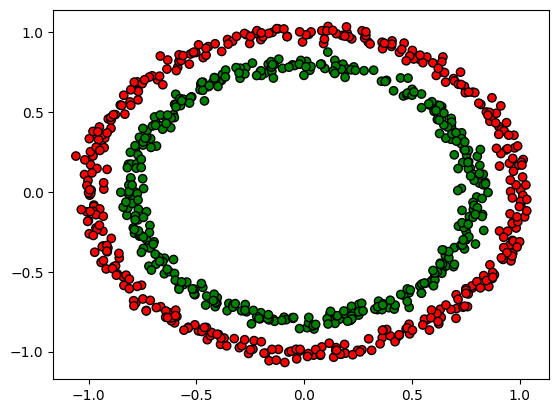

In [ ]:
# Visualzing using our training data only
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = my_cmap, edgecolors = "k")
plt.show()

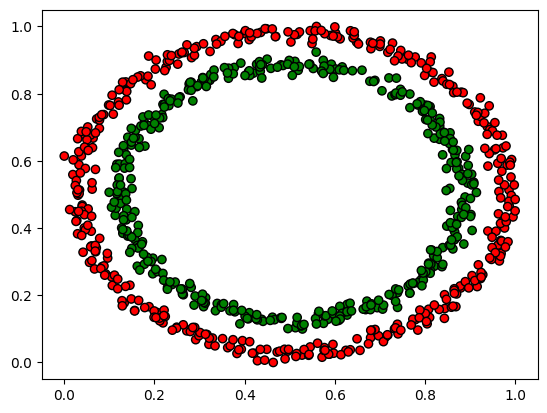

In [ ]:
# Visualizing using our training and scaled data
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c = y_train, cmap = my_cmap, edgecolors = "k")
plt.show()

In [ ]:
# Adding hidden layers and non-linear activation functions such as ReLU and Tanh
model_2 = tf.keras.Sequential([
    tf.keras.Input(shape = (2,), name = "Input tensor"),
    tf.keras.layers.Dense(16, activation = "tanh", name = "FirstHidden"),
    tf.keras.layers.Dense(16, activation = "tanh", name = "SecondHidden"),
    tf.keras.layers.Dense(1, activation = "sigmoid", name = "Output") # Using sigmoid for binary classification
], name = "Model_2")

# Compiling our model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])

# Summary of our model
model_2.summary()

Model: "Model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ FirstHidden (Dense)             │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ SecondHidden (Dense)            │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

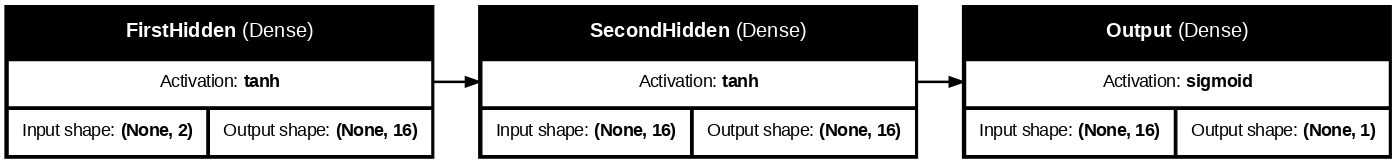

In [ ]:
# Using plot_model() utility function to visualize our model_2
plot_model(model_2, show_shapes = True, show_layer_names = True, show_layer_activations = True, rankdir = "LR", dpi = 90)

In [ ]:
# Fitting our model and using EarlyStopping callback to avoid overfitting
early_stop_obj = tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)

# Now Fitting our Model i.e. model_2
history_2 = model_2.fit(X_train_scaled, y_train, epochs = 200, callbacks = [early_stop_obj], verbose = 1)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5129 - loss: 0.6970
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5076 - loss: 0.6946
Epoch 3/200


/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5029 - loss: 0.6944
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5014 - loss: 0.6939
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5073 - loss: 0.6920  
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5433 - loss: 0.6894
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5313 - loss: 0.6868 
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5569 - loss: 0.6835 
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5628 - loss: 0.6796 
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5534 - loss: 0.6748 
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5486 - loss: 0.6695 
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5515 - loss: 0.6634 
Epoch 13/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5600 - loss: 0.6571 
Epoch 14/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

In [ ]:
# Evaluating our model
model_2.evaluate(X_test_scaled, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9199 - loss: 0.1783  


[0.19954197108745575, 0.9100000262260437]

# Making Predictions

In [ ]:
data = X_test_scaled[1:4, :]
print(data)
class_data = y_test[1:4]
print(class_data)

# Now Making predictions
pred_data = model_2.predict(data)
print(pred_data)
print(pred_data[0])
print(pred_data.shape)

[[0.51350827 0.96388503]
 [0.1704168  0.35795292]
 [0.3698868  0.96690414]]
[0 1 0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[[1.7766637e-05]
 [9.9993974e-01]
 [4.2031836e-08]]
[1.7766637e-05]
(3, 1)


# Understanding how to make Decision boundary and making one for my Model i.e. model_2

In [ ]:
# Finding the limits of data so that the plot covers the whole area
# Making a function
# X[:,0] → all values of feature 1 (x-axis).
# X[:,1] → all values of feature 2 (y-axis).
# .min() and .max() → smallest and largest values in the dataset.
# Subtracting 0.1 from the min and adding 0.1 to the max just gives a little extra margin around your data points,
# so the boundary plot isn’t cut off right at the edge of the data cloud.
# Think of it like: “zoom out slightly so we see the whole picture comfortably.”
def plot_boundary(model, X, y, scaler, resolution):
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                         np.linspace(y_min, y_max, resolution))
#     Think of this like laying graph paper over your data:
#     xx, yy = coordinates of 40,000 small squares covering the plane.
#     If resolution = 200 than shape of xx = (200, 200) and yy = (200, 200)

    grid = np.c_[xx.ravel(), yy.ravel()]
    scaled_grid = scaler.transform(grid)
#   Using the same scaler to transform on the similar shape and type of data --> i.e in np.array and shape = (40000, 2)

  # 4) Get model predictions
    preds = model.predict(scaled_grid, verbose=0)
    Z = (preds > 0.5).astype(int).reshape(xx.shape)  # binary classification
    # the shape of preds is (40000, 1) but contourf expects the shape of Z to be same as xx so we reshape to the shape of xx

 # 5) Plot decision regions and data
    plt.contourf(xx, yy, Z, cmap="bwr", alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap="bwr", edgecolors="k")
    plt.show()


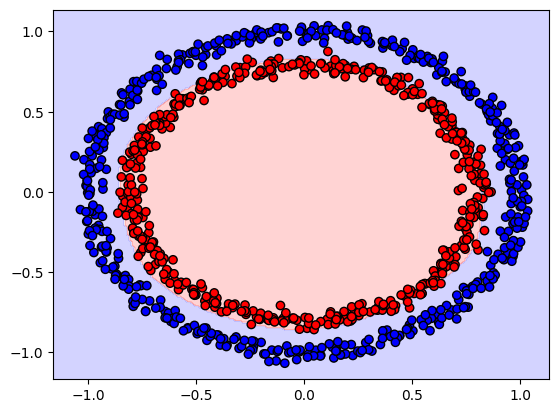

In [ ]:
plot_boundary(model_2, X, y, scaler=scaler, resolution = 200)


# Making a class to plot decision boundary

In [ ]:
### WORKINGS UNDERSTANDING ON MULTICLASS PREDICTION ###
a = np.array([1,2])
b = np.array([3,4])

xx, yy = np.meshgrid(a, b)
print(f"xx = \n{xx}")
print(f"\n yy = \n{yy}")

grid = np.c_[xx.ravel(), yy.ravel()]
print(f"\n Grid =\n{grid}")

multiclass_pred = np.array([[0.5, 0.2, 0.2], # Here co-ordinate (1,3) --> class 1
                            [0.7, 0.1, 0.2], # Here co-ordinate (2,3) --> class 1
                            [0.1, 0.6, 0.3], # Here co-ordinate (1,4) --> class 2
                            [0.1, 0.1, 0.8]]) # Here co-ordinate (2,4) --> class 3

print(f"\n The length of multiclasss_pred = {len(multiclass_pred[0])}")

print(f"\nThe shape of xx is {xx.shape}")
if len(multiclass_pred[0]) > 1:
  multiclass_pred = np.argmax(multiclass_pred, axis = 1)
  print(f"\n multiclass_pred before reshape = \n{multiclass_pred}")
  multiclass_pred = multiclass_pred.reshape(xx.shape)

print(f"\n multiclass_pred after reshape = \n{multiclass_pred}")

xx = 
[[1 2]
 [1 2]]

 yy = 
[[3 3]
 [4 4]]

 Grid =
[[1 3]
 [2 3]
 [1 4]
 [2 4]]

 The length of multiclasss_pred = 3

The shape of xx is (2, 2)

 multiclass_pred before reshape = 
[0 0 1 2]

 multiclass_pred after reshape = 
[[0 0]
 [1 2]]


In [ ]:
class DecisionBoundary:
  def __init__(self, model, X, y, scaler = None , resolution = 200): # For Constructor
    self.model = model
    self.X = X
    self.y = y
    self.scaler = scaler
    self.resolution = resolution

  def plot_decision_boundary(self, ax = None):
    if ax == None:
      ax = plt.gca() # get current axes

    x_min, x_max = self.X[:, 0].min()-0.1, self.X[:, 0].max()+ 0.1
    y_min, y_max = self.X[:, 1].min()-0.1, self.X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, self.resolution), np.linspace(y_min, y_max, self.resolution))

    grid = np.c_[xx.ravel(), yy.ravel()]
    if scaler != None:
      scaled_grid = self.scaler.transform(grid) # Using scaler

    # Now making predictions
    Z = self.model.predict(scaled_grid, verbose = 0)

    # Checking for multi-class
    if len(Z[0]) > 1:
      print("Doing Multi-class Classification.")
      Z = np.argmax(Z, axis = 1).reshape(xx.shape)
    else:
      print("Doing Binary Classification.")
      Z = np.round(Z).reshape(xx.shape)

    # Plotting the actual decision boundary
    ax.contourf(xx, yy, Z, cmap="bwr", alpha=0.2)
    ax.scatter(self.X[:,0], self.X[:,1], c=self.y, cmap="bwr", edgecolors="k")



# Using DecisionBoundary class to plot the decision boundary

Doing Binary Classification.


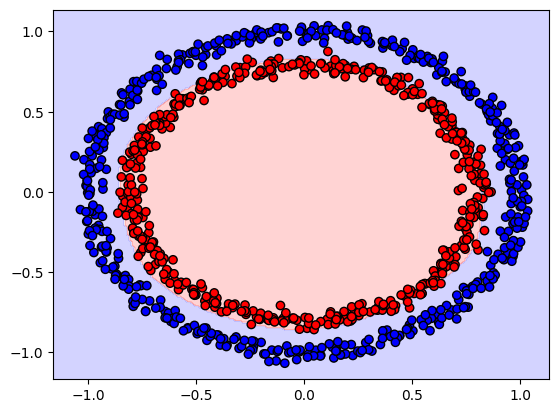

In [ ]:
boundary_obj = DecisionBoundary(model_2, X, y, scaler, resolution = 200)
boundary_obj.plot_decision_boundary()

# THE MISSING PIECE : NON-LINEARITY

**NOTE:** The combination of **linear (straight-lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

# Linear and non-linear functions in action

In [ ]:
# Creating a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10, 1), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

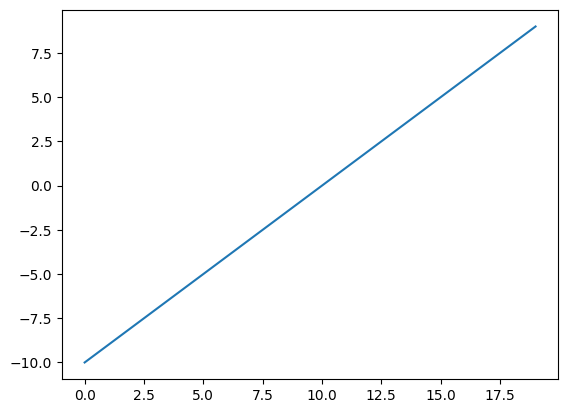

In [ ]:
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid i.e f(x) = 1 / 1 + exp(-x)
# Making our own sigmoid function

def sigmoid(x):
  return 1 / (1 + tf.math.exp(-x)) # NOTE: The alias of tf.math.exp() is tf.exp()

In [ ]:
# Using our own made sigmoid function on our toy tensor A
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

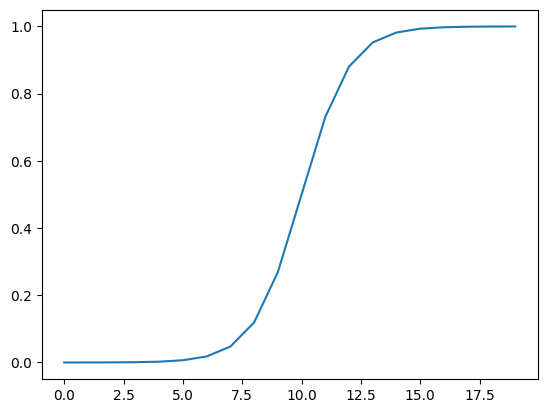

In [ ]:
# Plotting our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

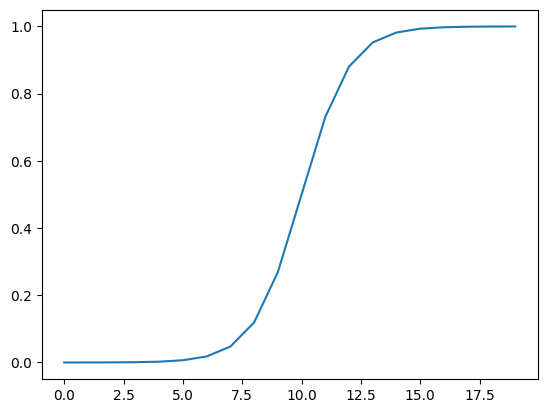

In [ ]:
# Now using tensorflow activation function of sigmoid and plotting the figure
plt.plot(tf.keras.activations.sigmoid(A))

In [ ]:
# Let's recreate our own relu function
def relu(x):
  return tf.math.maximum(0, x)

In [ ]:
# Using the rele function on our toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

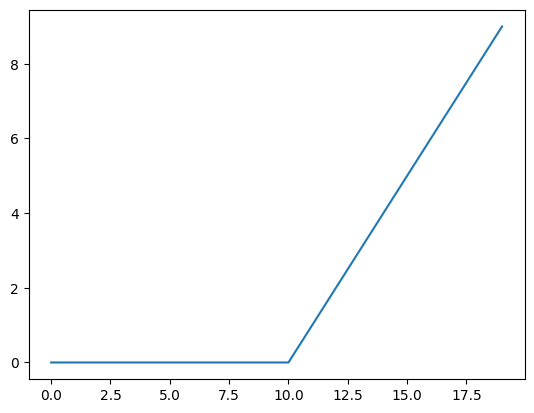

In [ ]:
# Plotting the result of our relu function on the toy tensor
plt.plot(relu(A))

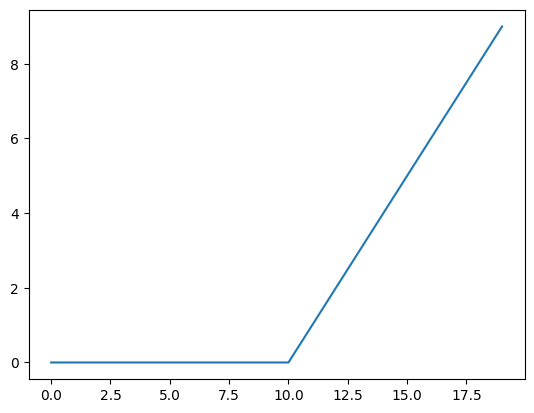

In [ ]:
# Using the tf.keras.activations.relu() function on our toy tensor
plt.plot(tf.keras.activations.relu(A))

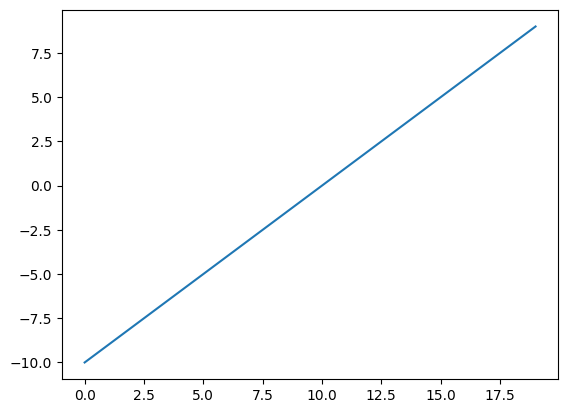

In [ ]:
# For completeness let's draw linear function too.
plt.plot(tf.keras.activations.linear(A))

In [ ]:
A == tf.keras.activations.linear(A) # It proves that y = x

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

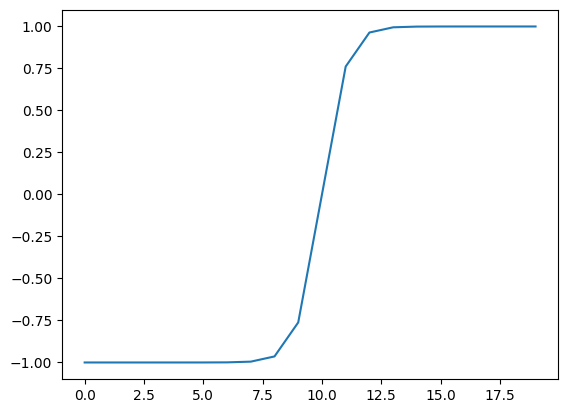

In [ ]:
# Now checking the tanh activation function on our toy tensor A
plt.plot(tf.keras.activations.tanh(A))

# LEARNING ABOUT LEARNING RATE TO IMPROVE OUR MODEL

In [ ]:
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [ ]:
model_2.summary()

Model: "Model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ FirstHidden (Dense)             │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ SecondHidden (Dense)            │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,013 (3.96 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 676 (2.64 KB)

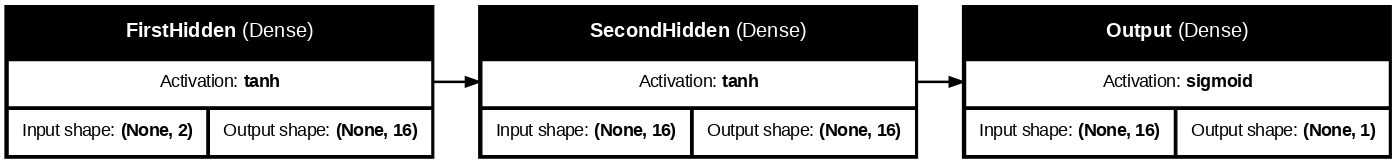

In [ ]:
# Using plot_model function to visualize model_2
plot_model(model_2, show_shapes = True, show_layer_names = True, rankdir = "LR", show_layer_activations = True, dpi = 90)

In [ ]:
# Evaluating our model_2
model_2.evaluate(X_test_scaled, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9199 - loss: 0.1783 


[0.19954197108745575, 0.9100000262260437]

In [ ]:
# Using DecisionBoundary class
train_boundary = DecisionBoundary(X = X_train, y = y_train, model = model_2, scaler = scaler, resolution = 200)
test_boundary = DecisionBoundary(model_2, X_test, y_test, scaler, 200)

Doing Binary Classification.
Doing Binary Classification.


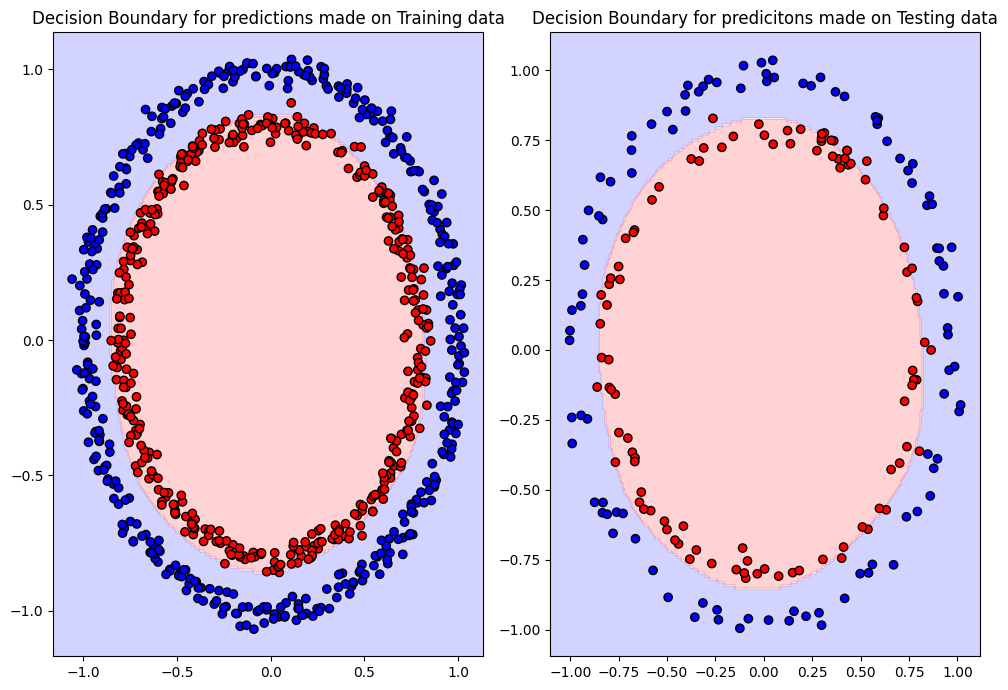

In [ ]:
# Plotting decision boundary separately for training dataset and testing dataset
# Using object oriented approach in matplotlib where plt.subplots() function returns Figure and Axes objects

fig, axes = plt.subplots(1, 2, figsize = (10,7))
train_boundary.plot_decision_boundary(ax = axes[0])
axes[0].set_title("Decision Boundary for predictions made on Training data")
test_boundary.plot_decision_boundary(ax = axes[1])
axes[1].set_title("Decision Boundary for predicitons made on Testing data")
plt.tight_layout()

# plt.tight_layout() operates at the figure level, not the axes level.
# Why this matters
# Your class method (plot_decision_boundary) is designed to work on a single Axes object (ax), not on the whole Figure.
# But plt.tight_layout() tries to adjust spacing for all subplots in the current figure.
# So if you call it inside the class:
# It runs after every call to plot_decision_boundary.
# That means while you’re still building subplots, the layout gets recalculated too early → and you lose control over the final arrangement.

# If you call it outside, once, after all subplots are drawn:
# The figure is complete.
# tight_layout can safely adjust spacing across the entire figure, making sure titles, labels, and axes don’t overlap.
# ✅ Rule of thumb
# Inside class method → only handle drawing on the given ax.
# Outside, after plotting → handle figure-wide adjustments like plt.tight_layout(), plt.subplots_adjust(), or plt.show().

Doing Binary Classification.
Doing Binary Classification.


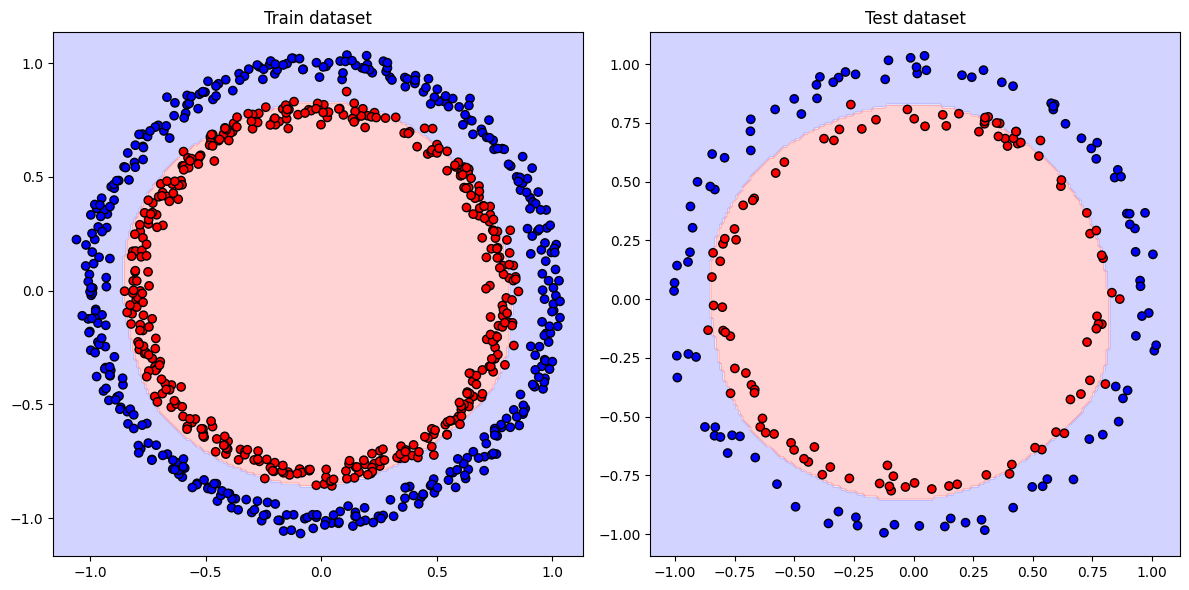

In [ ]:
# Plotting decision boundary separately for training and testing dataset without using object oriented approach

plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train dataset")
train_boundary.plot_decision_boundary()
plt.subplot(1, 2, 2)
plt.title("Test dataset")
test_boundary.plot_decision_boundary()

plt.tight_layout()
plt.show()

# Visualizing the training

In [ ]:
# Let's convert a history object into a DataFrame
pd.DataFrame(history_2.history)

,accuracy,loss
0,0.50875,0.697447
1,0.51250,0.695358
2,0.50250,0.695151
3,0.51125,0.693704
4,0.51500,0.690769
...,...,...
195,0.99375,0.014742
196,0.99500,0.014055
197,0.99500,0.015121
198,0.99500,0.014892


<Axes: >

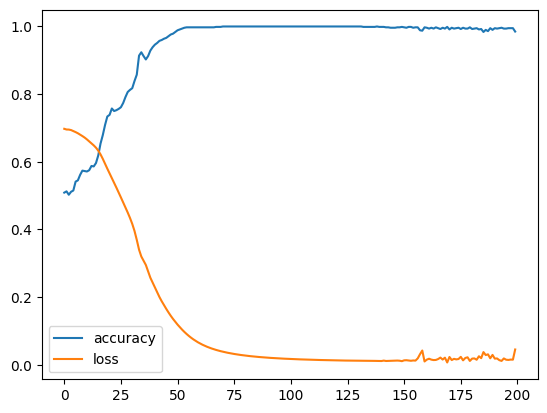

In [ ]:
# Let's plot the history curve
pd.DataFrame(history_2.history).plot()

# Finding the best Learning rate

To find the ideal learning rate ( the learning rate where the loss decreases the most during the training ) we're going to use the following steps:-
* A learning rate **callback** - a callback is a extra piece of functionality that you can add while training.

In [ ]:
# Creating a model with learning rate callback

model_3 = tf.keras.models.Sequential([
    tf.keras.Input(shape = (2,)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compiling model_3
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Using LearningRateScheduler Callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fitting the model_3 (passing lr_scheduler callback)
history_3 = model_3.fit(X_train,
                        y_train,
                        epochs = 100,
                        callbacks = [lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5108 - loss: 0.6916 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5102 - loss: 0.6914 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5098 - loss: 0.6912 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5073 - loss: 0.6910 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5171 - loss: 0.6908 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5283 - loss: 0.6905 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5599 - loss: 0.6903 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5212 - loss: 0.6900 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5005 - loss: 0.6897 - learning_

In [ ]:
pd.DataFrame(history_3.history)

,accuracy,loss,learning_rate
0,0.50125,0.692322,0.000100
1,0.50625,0.692112,0.000112
2,0.50375,0.691901,0.000126
3,0.50375,0.691676,0.000141
4,0.51875,0.691442,0.000158
...,...,...,...
95,0.48750,0.758660,5.623413
96,0.49250,0.758202,6.309574
97,0.49000,0.813698,7.079458
98,0.50000,0.870680,7.943282


<Axes: xlabel='epochs'>

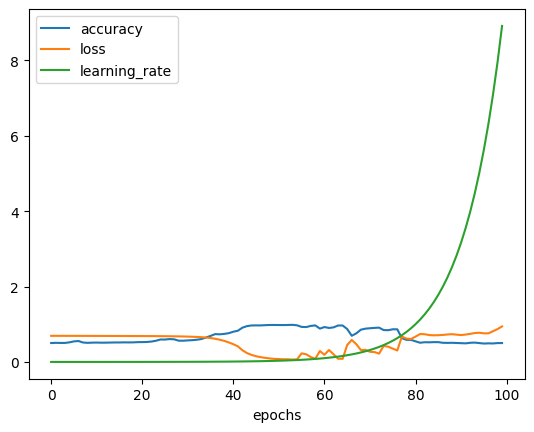

In [ ]:
# Plotting the history object using plot() function
pd.DataFrame(history_3.history).plot(xlabel = "epochs")

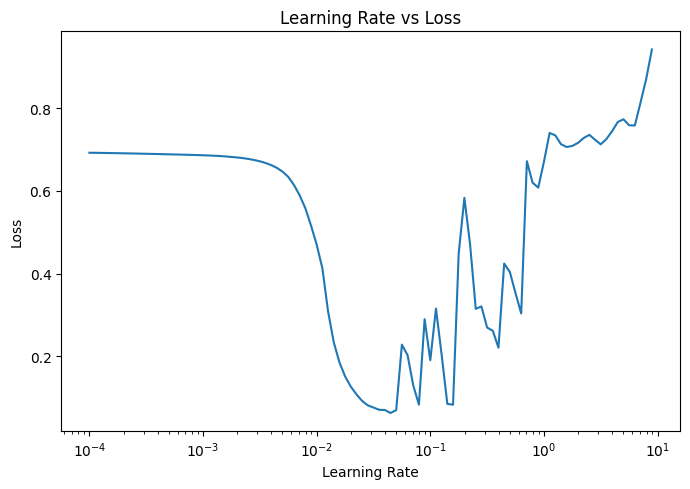

In [ ]:
# Plotting the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize = (7, 5))
plt.semilogx(lrs, history_3.history["loss"])

# Try this too
# plt.plot(lrs, history_3.history["loss"])

plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.tight_layout()
plt.show()

In [ ]:
# Using a scheduler function for LearningRateScheduler callback
def scheduler(epoch):
  if epoch < 10:
    return 0.1
  else:
    return 0.01

# Making model_4

model_4 = tf.keras.models.Sequential([
    tf.keras.Input(shape = (2,), name = "Input"),
    tf.keras.layers.Dense(16, activation = "tanh", name = "Hidden_1"),
    tf.keras.layers.Dense(16, activation = "tanh", name = "Hidden_2"),
    tf.keras.layers.Dense(1, activation = "sigmoid", name = "Output")
], name = "model_4")

# Compiling the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Using LearningRateScheduler callback
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

# Fitting the model
history_4 = model_4.fit(X_train,
            y_train,
            epochs = 100,
            callbacks = [callback])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5180 - loss: 0.7428 - learning_rate: 0.1000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5591 - loss: 0.6979 - learning_rate: 0.1000
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5376 - loss: 0.6992 - learning_rate: 0.1000
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6139 - loss: 0.6510 - learning_rate: 0.1000
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6842 - loss: 0.5736 - learning_rate: 0.1000
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8354 - loss: 0.4053 - learning_rate: 0.1000
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9009 - loss: 0.2406 - learning_rate: 0.1000
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9402 - loss: 0.1657 - learning_rate: 0.1000
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9885 - loss: 0.0726 - learning_rate: 0.1000
Epoch 10/100
25/25 

<Axes: >

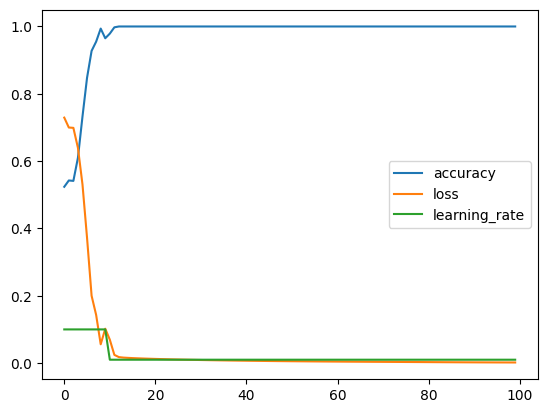

In [ ]:
# Plotting the history_4 in a curve
pd.DataFrame(history_4.history).plot()

Text(0.5, 1.0, 'Learning Rates vs loss')

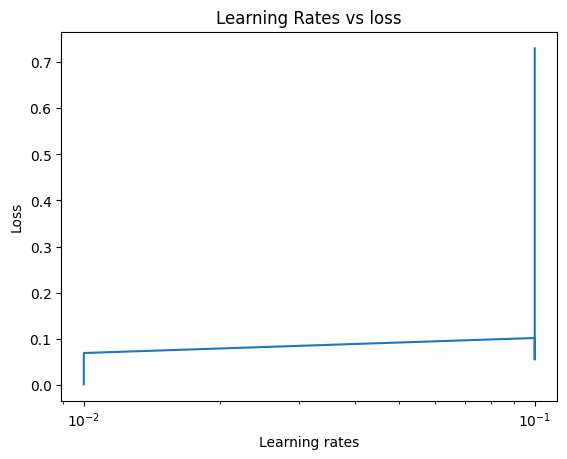

In [ ]:
# Plotting the learning rate and loss only
values = [0.1 if i < 10 else 0.01 for i in range(100)]

learning_rates = tf.constant(values, dtype = tf.float32)

# Now plotting a curve
plt.semilogx(learning_rates, history_4.history["loss"])
plt.xlabel("Learning rates")
plt.ylabel("Loss")
plt.title("Learning Rates vs loss")

In [ ]:
# Evaluatin model_4
model_4.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0044  


[0.004702913574874401, 1.0]

# MORE CLASSIFICATION EVALUATION METHODS


Some of the evaluation methods are:
* Accuracy
* Precision - A high precision leads to less false positives.
* Recall - A high recall leads to less false negatives.
* Precision and recall tradeoff
* f1-score - Harmonic mean between precision/recall.
* Confusion matrix
* Classification report (from scikit-learn)

In [ ]:
# Checking the accuracy of our model_4
loss, accuracy = model_4.evaluate(X_test, y_test)
print(f"Loss on test data for model_4 : {loss}")
print(f"Accuracy on test data for model_4 : {(accuracy * 100):+.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0044 
Loss on test data for model_4 : 0.004702913574874401
Accuracy on test data for model_4 : +100.00%


# Learning about Confusion Matrix

In [ ]:
y_preds = model_4.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [ ]:
cmat = confusion_matrix(y_test, tf.round(y_preds))
# without using tf.round()
#  it will give error as y_test is binary and y_preds is continuous values.
print(type(cmat))
print(cmat)

<class 'numpy.ndarray'>
[[100   0]
 [  0 100]]


# Making our confusion matrix look prettier

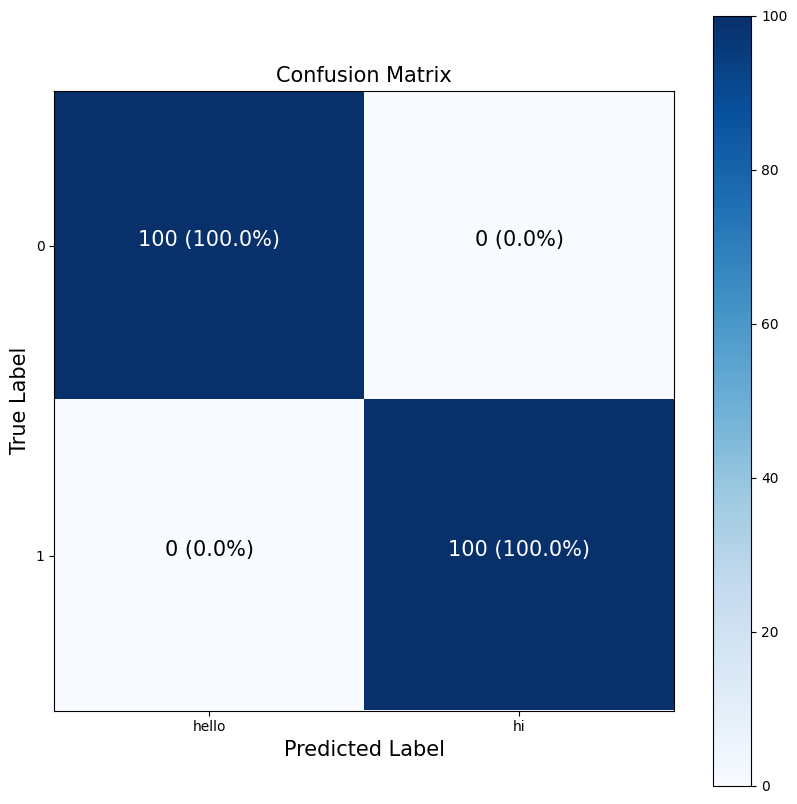

In [ ]:
import itertools

cmat = confusion_matrix(y_test, tf.round(y_preds))
cmat_norm = cmat.astype(float) / np.sum(cmat.astype(float), axis = 1)[:, np.newaxis]
# print(cmat_norm) # Checking
n_classes = cmat.shape[0]

# Using object oriented approach
fig, axes = plt.subplots(figsize = (10, 10))
# Creating a matrix plot
sam = axes.matshow(cmat, cmap = plt.cm.Blues)
fig.colorbar(sam)

# Create Classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cmat.shape[0])

# Label the axes
axes.set(title = "Confusion Matrix",
         xlabel = "Predicted Label",
         ylabel = "True Label",
         xticks = np.arange(n_classes),
         yticks = np.arange(n_classes),
         xticklabels = ["hello", "hi"],
         yticklabels = labels)

# Set x-axis labels to bottom
axes.xaxis.set_label_position("bottom")
axes.xaxis.tick_bottom()

# Adjust label size
axes.yaxis.label.set_size(15)
axes.xaxis.label.set_size(15)
axes.title.set_size(15)

# Set threshold for different colors
threshold = (cmat.max()+cmat.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cmat.shape[0]), range(cmat.shape[1])):
      axes.text( # We can also write plt.text() here insteas of axes.text()
        j, i, # V.V.V.V IMP
        f"{cmat[i, j]} ({cmat_norm[i, j]*100:.1f}%)",
        horizontalalignment="center",
        color="white" if cmat[i, j] > threshold else "black", # Single line conditional expression.
        size=15
    )


In [ ]:
### WORKINGS FOR ABOVE CELL ###
print(cmat.astype(float))
print(cmat.sum(axis = 1))
print(np.sum(cmat, axis = 1))
print(np.sum(cmat, axis = 1).shape)
print(np.sum(cmat, axis = 1)[:, np.newaxis]) # It add a new dimension
print(np.sum(cmat, axis = 1)[:, np.newaxis].shape)

# Checking
arr = np.array([[1, 2, 3],
                [4, 5, 6]])
print(f"The sum in axis 1 is : {np.sum(arr, axis = 1)}")
print(np.sum(arr, axis = 1)[:, np.newaxis])

print(cmat.astype(float)/np.sum(cmat.astype(float), axis = 1)[:, np.newaxis])

# Checking 1
print(cmat.shape[0])
print(np.arange(cmat.shape[0]))
sar = np.arange(5)
print(sar)
print(type(sar))

# Workings with itertools.product()
print("Working with itertools.product()")
for i, j in itertools.product([0,1], [0,1]):
  print(f"[{i}, {j}]")
# Using range in itertools.product()
print("Working with itertools.product() using range")
for i, j in itertools.product(range(cmat.shape[0]), range(cmat.shape[1])):
    print(f"[{i}, {j}]")

# Checking for threshold
print(threshold)

# Co-ordinates
print("Co-ordinates")
print(cmat[0, 0])

[[100.   0.]
 [  0. 100.]]
[100 100]
[100 100]
(2,)
[[100]
 [100]]
(2, 1)
The sum in axis 1 is : [ 6 15]
[[ 6]
 [15]]
[[1. 0.]
 [0. 1.]]
2
[0 1]
[0 1 2 3 4]
<class 'numpy.ndarray'>
Working with itertools.product()
[0, 0]
[0, 1]
[1, 0]
[1, 1]
Working with itertools.product() using range
[0, 0]
[0, 1]
[1, 0]
[1, 1]
50.0
Co-ordinates
100


In [ ]:
# Making a Class With Static method to plot Confusion Matrix two types in the same figure

class ConfusionMatrix:
  def __init__(self, y_true, y_pred, classes = None):
    self.y_true = y_true
    self.y_pred = y_pred
    self.classes = classes

  def plot_confusion_matrix(self):
    cmat = confusion_matrix(self.y_true, tf.round(self.y_pred))
    cmat_norm = cmat.astype(float) / np.sum(cmat, axis = 1)[:, np.newaxis]

    # No of classes
    n_classes = cmat.shape[0]

    # Matplotlib
    fig, axes = plt.subplots(2, 1, figsize = (15, 15))
    sam = axes[0].matshow(cmat, cmap = "Blues")
    fig.colorbar(sam, ax = axes[0])

    sar = axes[1].matshow(cmat_norm, cmap = "Blues")
    fig.colorbar(sar, ax = axes[1])

    # This allows us to show labels in xticklabels and yticklabels instead of 0  1  2
    if self.classes:
      labels = self.classes
    else:
      labels = np.arange(cmat.shape[0])

    # Label the axes
    axes[0].set(title = "Confusion Matrix",
            xlabel = "Predicted Label",
            ylabel = "True Label",
            xticks = np.arange(n_classes),
            yticks = np.arange(n_classes),
            xticklabels = labels,
            yticklabels = labels)

    axes[1].set(title = "Confusion Matrix_normal",
            xlabel = "Predicted Label",
            ylabel = "True Label",
            xticks = np.arange(n_classes),
            yticks = np.arange(n_classes),
            xticklabels = labels,
            yticklabels = labels)

    # Adjust label size
    axes[0].yaxis.label.set_size(15)
    axes[0].xaxis.label.set_size(15)
    axes[0].title.set_size(15)

    axes[1].yaxis.label.set_size(15)
    axes[1].xaxis.label.set_size(15)
    axes[1].title.set_size(15)

    # Set threshold for different colors
    threshold = (cmat.max()+cmat.min()) / 2

    # Plotting the text in each cell
    for i, j in itertools.product(range(cmat.shape[0]), range(cmat.shape[1])):
      axes[0].text(j, i,
                      f"{cmat[i, j]}",
                      horizontalalignment="center",
                      color="white" if cmat[i, j] > threshold else "black", # Single line conditional expression.
                      size=15)

      axes[1].text(j, i,
                      f"{cmat_norm[i, j]}",
                      horizontalalignment="center",
                      color="white" if cmat[i, j] > threshold else "black", # Single line conditional expression.
                      size=15)

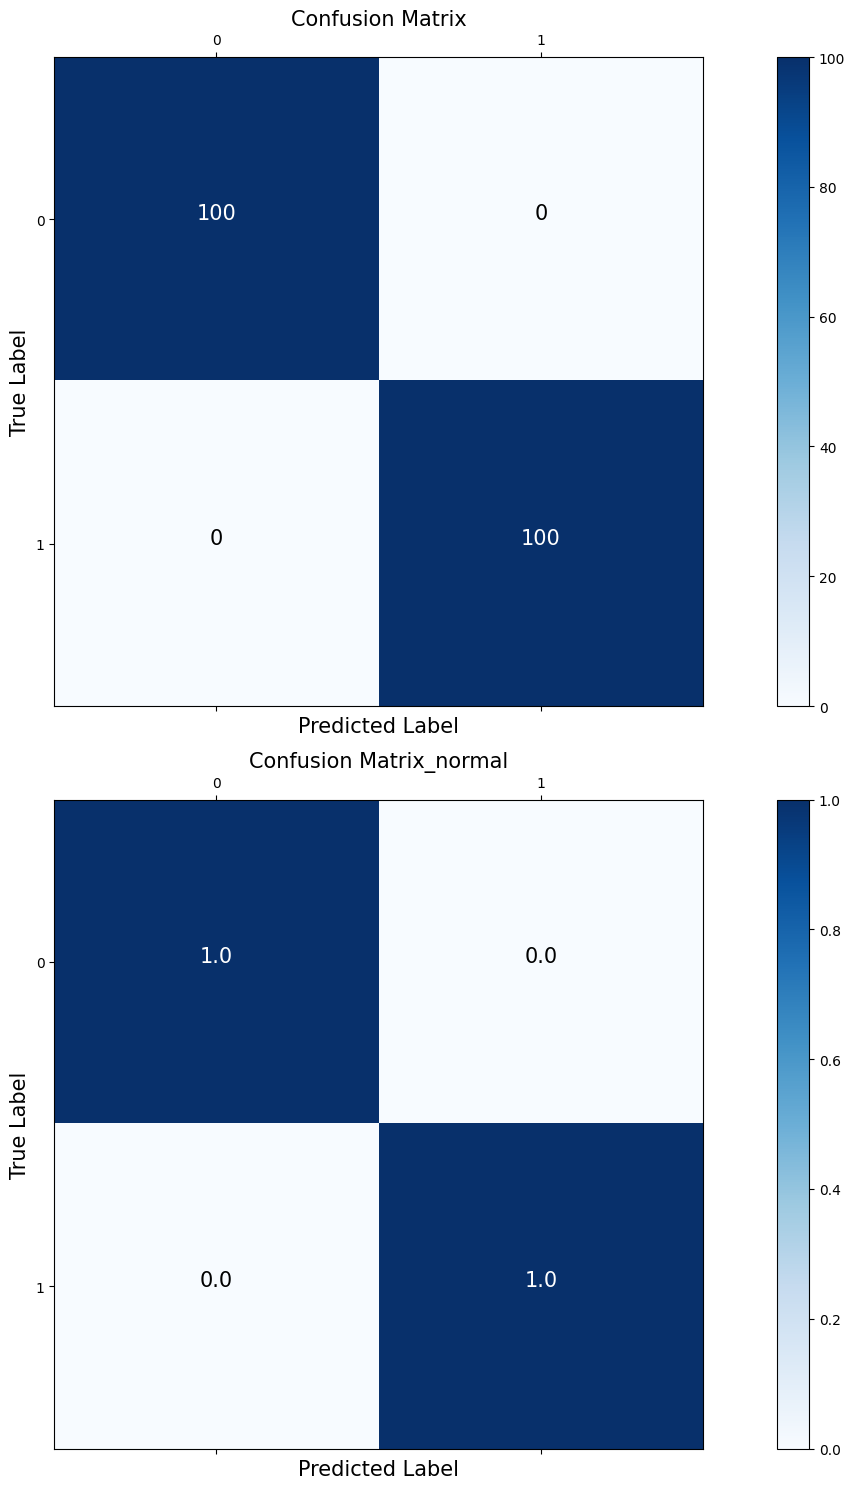

In [ ]:
cmat_obj = ConfusionMatrix(y_test, y_preds)
cmat_obj.plot_confusion_matrix()
plt.tight_layout()

# Working with Larger Example (Multi-class Classification)

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
print(fashion_mnist)

<module 'keras.datasets.fashion_mnist' from '/usr/local/lib/python3.12/dist-packages/keras/datasets/fashion_mnist/__init__.py'>


In [ ]:
# Loading the dataset using load_data() function of fashion_mnist module
# It returns two tuples as shown below
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

In [ ]:
# Let's learn and visualize about the data.
print(type(train_data))
print(type(train_label))
print(train_data.shape)
print(train_label.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)


In [ ]:
# Visualizing the train_data
train_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# NOTE: Here dtype = uint8 which means it is unsigned interger of 8 bit i.e 2^8 = 256
# 0 to 255 (0 --> black) and (255 --> white)

# Now lets visualize a single data from train_data
print(train_data[0])
print(f"\nThe shape is :-")
print(train_data[0].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [ ]:
# Let's create a small list so that we can index onto our training-label in human readable form:
# List of class names (labels for Fashion MNIST)
class_names = [
    "T-shirt/top",  # 0
    "Trouser",      # 1
    "Pullover",     # 2
    "Dress",        # 3
    "Coat",         # 4
    "Sandal",       # 5
    "Shirt",        # 6
    "Sneaker",      # 7
    "Bag",          # 8
    "Ankle boot"    # 9
]


Text(0.5, 1.0, 'Label = Ankle boot')

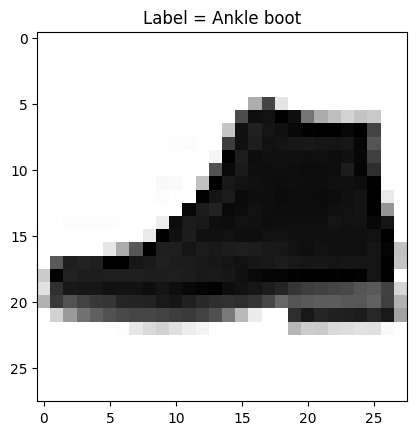

In [ ]:
# Plot an example image and its label:
index_of_choice = 42
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(f"Label = {class_names[train_label[index_of_choice]]}")

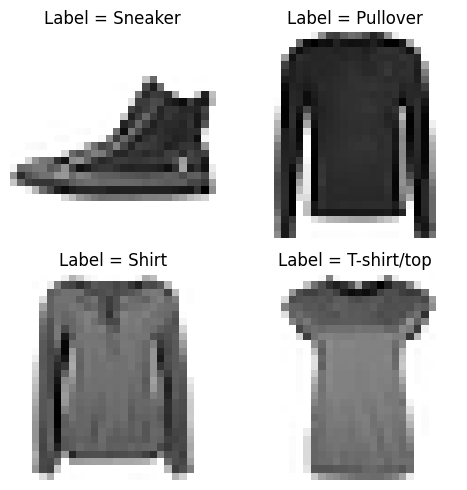

In [ ]:
# Using random module to visualize our data.
import random
plt.figure(figsize = (5, 5))
for i in range(4):
  ax = plt.subplot(2, 2, i+1) # You can also write plt.subplot(2, 2, i+1)
  random_choice = random.choice(range(len(train_data)))
  plt.imshow(train_data[random_choice], cmap = plt.cm.binary)
  plt.title(f"Label = {class_names[train_label[random_choice]]}")
  plt.axis("off") # You can also write plt.axis(False)

plt.tight_layout()
plt.show()

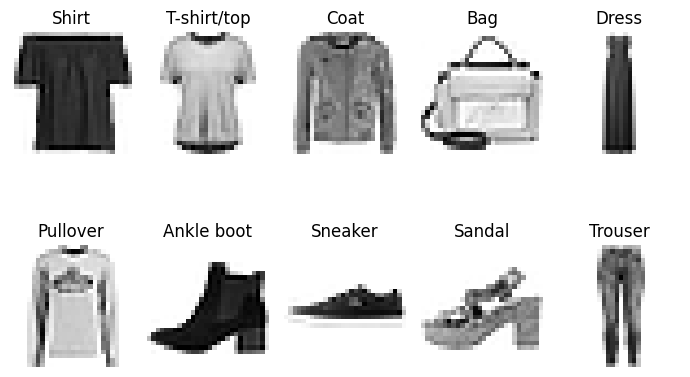

In [ ]:
# Using random module creating a figure with all ten different classes/labels:
empty_list = []
plt.figure(figsize =(7, 5))
i = 1
while len(empty_list) < 10:
  # Previously I used for loop in that case
  # You are looping exactly 10 times (for i in range(10)).
  # But sometimes, random_label_no is a duplicate class (e.g., two “Dress” or “Bag” labels).
  random_choice = random.choice(range(len(train_data)))
  random_label_no = train_label[random_choice]

  # Using if condition for plotting different classes
  if random_label_no not in empty_list:
    empty_list.append(random_label_no)
    plt.subplot(2, 5, i)
    plt.imshow(train_data[random_choice], cmap = plt.cm.binary)
    plt.title(f"{class_names[train_label[random_choice]]}")
    plt.axis(False) # We can also write plt.axis("off")
    i += 1

plt.tight_layout()
plt.show()


# Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy() or tf.keras.losses.SparseCategoricalCrossentropy() i.e when the labels are one-hot encoded use CategoricalCrossentropy() and when the labels are integers use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)


In [ ]:
# Learning about tf.keras.layers.Flatten() with the help of example.
flattened_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28))])
print(flattened_model.input_shape) # Here input_shape and output_shape are attributes of Sequential / Parent (Model class)
print(flattened_model.output_shape)

(None, 28, 28)
(None, 784)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Now building a multi-class Classification model
multiclass_model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu", name = "Hidden1"),
    tf.keras.layers.Dense(4, activation = "relu", name = "Hidden2"),
    tf.keras.layers.Dense(10, activation = "softmax", name = "Output")
], name = "Multiclass_model1")

# Compiling the model
multiclass_model1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["accuracy"])

# Model Summary
multiclass_model1.summary()

Model: "Multiclass_model1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden1 (Dense)                 │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,210 (12.54 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

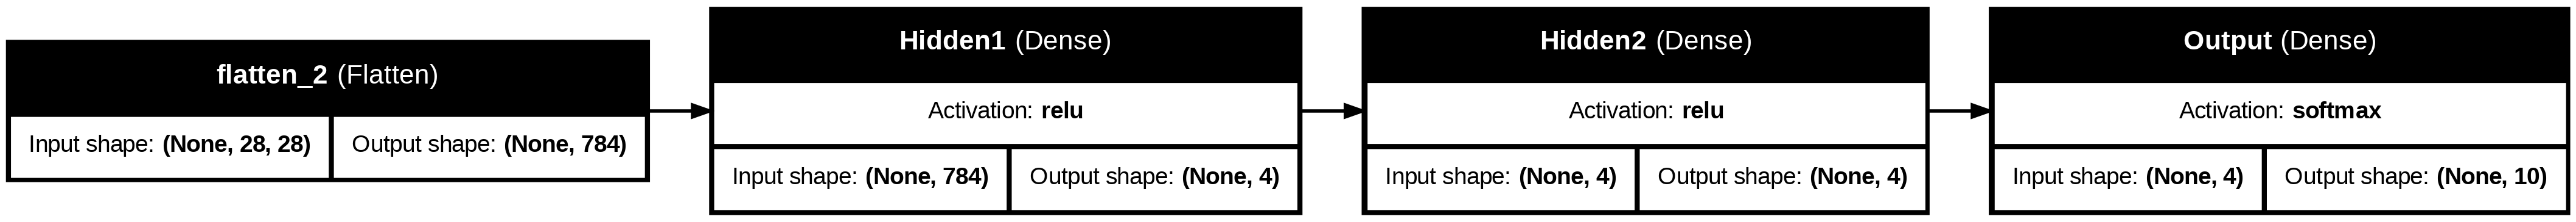

In [ ]:
# Visualizing the above model using plot_model() fucntion from keras.utils module
plot_model(multiclass_model1, show_shapes = True, show_layer_names = True, show_layer_activations = True, rankdir = "LR", dpi = 200)

In [ ]:
# Now fitting the model
non_norm_history1 = multiclass_model1.fit(train_data, train_label, epochs = 10, validation_data = (test_data, test_label), verbose = 1)

### NOTE: If we want to use CategoricalCrossentropy() as loss then, we have to do tf.one_hot(train_label, depth = 10) and in validation_data too
## we have to do tf.one_hot(test_label, depth = 10) depth = 10 as there are 10 classes/labels.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1117 - loss: 4.6750 - val_accuracy: 0.1336 - val_loss: 2.2343
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1386 - loss: 2.2407 - val_accuracy: 0.1612 - val_loss: 2.1497
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1664 - loss: 2.1508 - val_accuracy: 0.2848 - val_loss: 1.8083
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2903 - loss: 1.7147 - val_accuracy: 0.3334 - val_loss: 1.5046
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3449 - loss: 1.4798 - val_accuracy: 0.2859 - val_loss: 1.5813
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3953 - loss: 1.4047 - val_accuracy: 0.4350 - val_loss: 1.3093
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4344 - loss: 1.3256 - val_accuracy: 0.4400 - val_loss: 1.2975
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4394 - loss: 1.3035 - 

In [ ]:
# Checking the min and max values of training data
train_data.min(), train_data.max()

(np.uint8(0), np.uint8(255))

# Neural Networks prefer data that are scaled or normalized that is in the range of (0, 1)

In [ ]:
# Scaling (Normalizing, not Standarizing)

### OPTION 1 ###
# from sklearn.preprocessing import MinMaxScaler

# # Flatten the images: (60000, 28, 28) -> (60000, 784)
# train_data_2d = train_data.reshape(-1, 28*28)
# test_data_2d = test_data.reshape(-1, 28*28)

# # Apply MinMaxScaler
# scaler = MinMaxScaler()
# train_data_scaled = scaler.fit_transform(train_data_2d)
# test_data_scaled = scaler.transform(test_data_2d)

# Optionally reshape back to 28x28 for CNNs
# train_data_scaled = train_data_scaled.reshape(-1, 28, 28)
# test_data_scaled = test_data_scaled.reshape(-1, 28, 28)

### OPTION 2 ###
train_data_norm = train_data.astype("float32")/ 255.0
test_data_norm = test_data.astype("float32")/255.0
print(train_data_norm.dtype)

# Checking the minimum and maximum value of scaled (Normalized) training data.
print(train_data_norm.min(), train_data_norm.max())

float32
0.0 1.0


In [ ]:
# Workings --> Practice of Numpy Reshape
arr = np.array([[[1,2,3],[4,5,6]],
                [[5, 6, 7], [8, 9, 10]]])
print(arr)
print(arr.shape)

# 2*2*3 = 12
arr2 = arr.reshape(4, -1)
print(arr2)
print(arr2.shape)

arr3 = arr.reshape(2, -1)
print(arr3)
print(arr3.shape)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 5  6  7]
  [ 8  9 10]]]
(2, 2, 3)
[[ 1  2  3]
 [ 4  5  6]
 [ 5  6  7]
 [ 8  9 10]]
(4, 3)
[[ 1  2  3  4  5  6]
 [ 5  6  7  8  9 10]]
(2, 6)


In [ ]:
# Making new model
multiclass_model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compiling our Model
multiclass_model2.compile(loss = tf.keras.losses.CategoricalCrossentropy(), # Note: You can also use Sparse.. incase of integer labels.
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["accuracy"])

# Fitting our model on scaled(Normalized) training data.
norm_history2 = multiclass_model2.fit(train_data_norm,
                                      tf.one_hot(train_label, depth = 10),
                                      epochs = 10,
                                      validation_data = (test_data_norm, tf.one_hot(test_label, depth = 10)),
                                      verbose = 1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3972 - loss: 1.6124 - val_accuracy: 0.7425 - val_loss: 0.7943
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7523 - loss: 0.7315 - val_accuracy: 0.7765 - val_loss: 0.6684
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7828 - loss: 0.6285 - val_accuracy: 0.7916 - val_loss: 0.6220
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7951 - loss: 0.5879 - val_accuracy: 0.7985 - val_loss: 0.6010
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7997 - loss: 0.5700 - val_accuracy: 0.8016 - val_loss: 0.5887
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8030 - loss: 0.5585 - val_accuracy: 0.8033 - val_loss: 0.5813
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8058 - loss: 0.5501 - val_accuracy: 0.8057 - val_loss: 0.5758
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8077 - loss: 0.5435 - 

🔑 NOTE: Neural Networks tend to prefer data in numerical form as well as scaled / normalized i.e between (0 and 1)

<Axes: title={'center': 'Normalized-Data'}>

<Figure size 700x500 with 0 Axes>

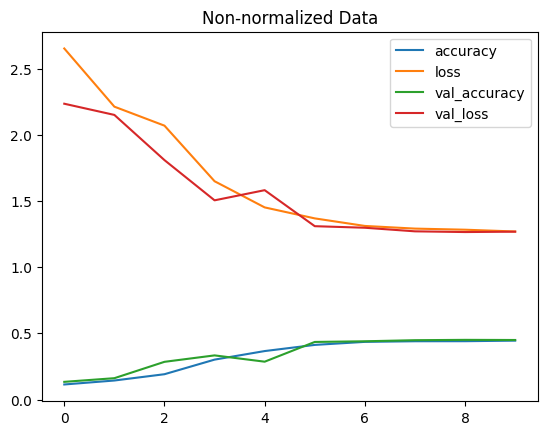

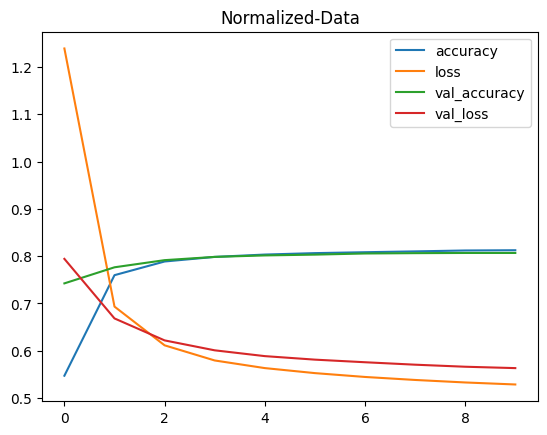

In [ ]:
# Plotting our history curves from our above two models
plt.figure(figsize = (7, 5))
# Non_normalized Data
pd.DataFrame(non_norm_history1.history).plot(title = "Non-normalized Data")

# Normalized Data
pd.DataFrame(norm_history2.history).plot(title = "Normalized-Data")

🔑 Note: The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture)

# Finding the ideal learning rate for our model

In [ ]:
# Building a model

# Creating a random seed
tf.random.set_seed(42)

multiclass_model3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compiling our model
multiclass_model3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["accuracy"])

# Creating a LearningRateScheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))

# Fitting the model
history3 = multiclass_model3.fit(train_data_norm, train_label, epochs = 40, callbacks = [lr_scheduler],
                      validation_data = (test_data_norm, test_label),  verbose = 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3164 - loss: 1.7970 - val_accuracy: 0.6157 - val_loss: 0.9802 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6569 - loss: 0.8944 - val_accuracy: 0.7367 - val_loss: 0.7548 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7470 - loss: 0.7235 - val_accuracy: 0.7479 - val_loss: 0.6995 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7622 - loss: 0.6736 - val_accuracy: 0.7532 - val_loss: 0.6820 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7697 - loss: 0.6492 - val_accuracy: 0.7614 - val_loss: 0.6693 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7730 - loss: 0.6322 - val_accuracy: 0.7643 - val_loss: 0.6643 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7747 - l

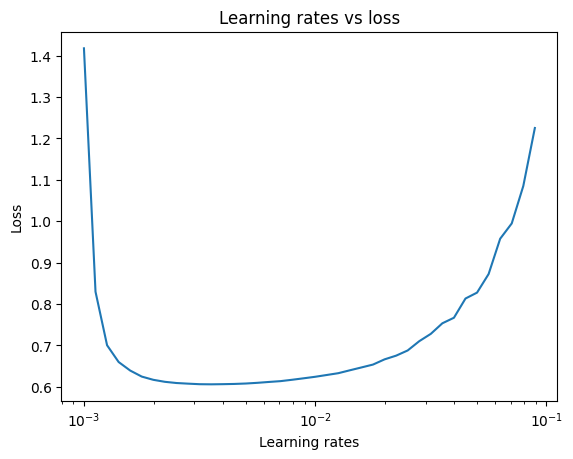

In [ ]:
# Let's find the ideal Learning rate with the help of plot i.e visually
learning_rates = 1e-3 * 10**(tf.range(40)/20)

plt.semilogx(learning_rates, history3.history["loss"])
plt.title("Learning rates vs loss")
plt.xlabel("Learning rates")
plt.ylabel("Loss")
plt.show()

In [ ]:
# Checking the highest accuracy at which learning rate before, current and after of it and also the epoch with highest accuracy
acc_list = history3.history["accuracy"]
best_epoch = np.argmax(acc_list) + 1   # +1 because epoch counting starts from 1
best_acc = acc_list[np.argmax(acc_list)]

print(f"Highest accuracy: {best_acc:.4f} at epoch {best_epoch}")


Highest accuracy: 0.7818 at epoch 14


In [ ]:
# Let's refit a model with the ideal learning rate i.e 0.001

# Using random seed
tf.random.set_seed(42)

multiclass_model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(10, activation = "relu", name = "Hidden1"),
    tf.keras.layers.Dense(10, activation = "relu", name = "Hidden2"),
    tf.keras.layers.Dense(10, activation = "softmax", name = "Output")
])

# Compiling the model with the ideal learning rate
multiclass_model4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                          optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                          metrics = ["accuracy"])

# Summary of the model
multiclass_model4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden1 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,070 (31.52 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

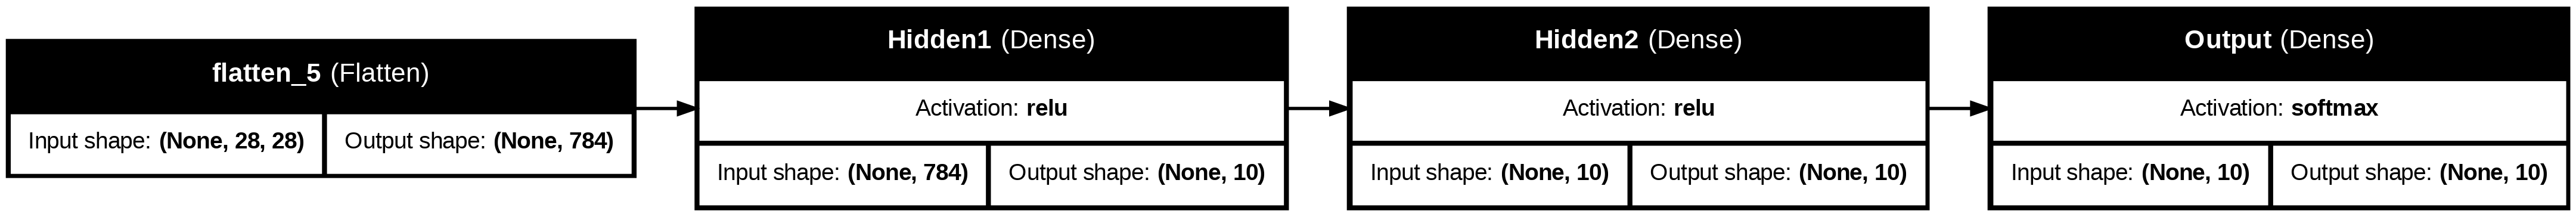

In [ ]:
# Visualizing the model using plot_model() function from tf.keras utils

plot_model(multiclass_model4, show_shapes = True, show_layer_names = True, show_layer_activations = True, rankdir = "LR", dpi = 200)

In [ ]:
# Fitting the model using scaled data (normalized)
history4 = multiclass_model4.fit(train_data_norm,
                     train_label,
                     validation_data = (test_data_norm, test_label),
                     epochs = 20,
                     verbose = 1)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6083 - loss: 1.0442 - val_accuracy: 0.8141 - val_loss: 0.5253
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8289 - loss: 0.4948 - val_accuracy: 0.8276 - val_loss: 0.4876
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8428 - loss: 0.4519 - val_accuracy: 0.8361 - val_loss: 0.4671
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8511 - loss: 0.4299 - val_accuracy: 0.8399 - val_loss: 0.4615
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8546 - loss: 0.4166 - val_accuracy: 0.8432 - val_loss: 0.4535
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8589 - loss: 0.4070 - val_accuracy: 0.8452 - val_loss: 0.4508
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8608 - loss: 0.3999 - val_accuracy: 0.8477 - val_loss: 0.4480
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8631 - loss: 0.3937 - 

In [ ]:
pd.DataFrame(history3.history)

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.438933,1.417589,0.6157,0.980169,0.001000
1,0.691733,0.829548,0.7367,0.754796,0.001122
2,0.750983,0.700238,0.7479,0.699507,0.001259
3,0.764400,0.659729,0.7532,0.682040,0.001413
4,0.770600,0.639103,0.7614,0.669337,0.001585
5,0.773833,0.624541,0.7643,0.664287,0.001778
6,0.775567,0.616743,0.7669,0.664415,0.001995
7,0.777083,0.611913,0.7659,0.666897,0.002239
8,0.779183,0.609012,0.7663,0.671098,0.002512
9,0.779667,0.607481,0.7660,0.675981,0.002818


In [ ]:
pd.DataFrame(history3.history)["accuracy"].max()

0.7817833423614502

# Evaluating our multiclass classification model4


To evaluate our multi-class classification model we could:

Evaluate its performance using other classification metrics (such as a confusion matrix)

Assess some of its predictions (through visualizations)

Improve its results (by training it for longer or changing the architecture)

Save and export it for use in an application

Let's go through the top 2

In [ ]:
# Let's make some predictions with our multiclass_model4
y_probs = multiclass_model4.predict(test_data_norm)
y_probs

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.3718484e-09, 7.4233505e-08, 6.8889200e-11, ..., 5.7704855e-02,
        3.4298243e-06, 9.3578422e-01],
       [1.0792116e-05, 1.0976487e-06, 9.8976302e-01, ..., 2.2529285e-31,
        3.4895001e-07, 5.3488244e-33],
       [1.1819919e-06, 9.9998683e-01, 1.0533502e-05, ..., 2.6173272e-28,
        1.0706172e-08, 2.0198703e-27],
       ...,
       [1.4641684e-01, 1.5072028e-06, 2.5934789e-03, ..., 5.0808188e-11,
        2.8302428e-01, 5.8190291e-13],
       [3.2074688e-05, 9.9978375e-01, 2.9307792e-05, ..., 3.1562021e-15,
        1.2224601e-07, 1.2340327e-13],
       [3.3900116e-07, 2.3126395e-06, 4.7134100e-07, ..., 9.1668777e-04,
        9.2028558e-06, 7.2987626e-05]], dtype=float32)

🔑 Note: Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [ ]:
tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(<tf.Tensor: shape=(), dtype=int64, numpy=9>, 'Ankle boot')

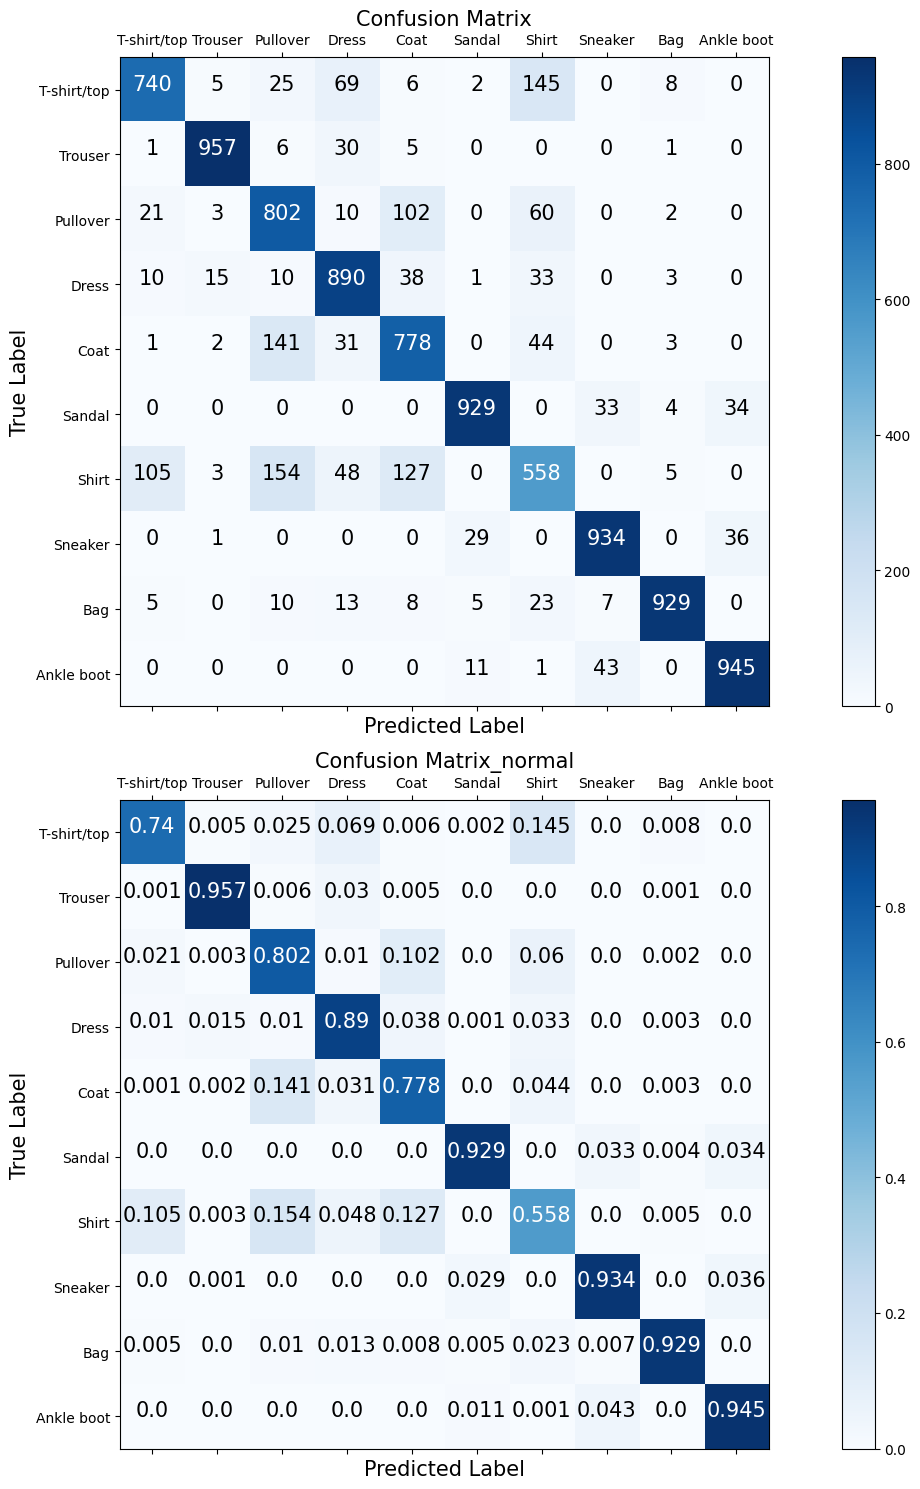

In [ ]:
obj = ConfusionMatrix(test_label, tf.argmax(y_probs, axis = 1), classes = class_names)
obj.plot_confusion_matrix()
plt.tight_layout()

In [ ]:
test_label, tf.argmax(y_probs), tf.argmax(y_probs, axis = 1)

(array([9, 2, 1, ..., 8, 1, 5], dtype=uint8),
 <tf.Tensor: shape=(10,), dtype=int64, numpy=array([7311, 4962,  174, 6724, 3262,  418, 3966, 3784, 3502,  980])>,
 <tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 6, 1, 5])>)

From the confusion matrix we can say that while predicting for T-shirt our model is getting confused on shirt. So may be we should incorporate T-shirt class with shirt class or we can increase training samples on shirts....

🔑 How about we create a fun little function for:

- Plot a random image
- Make a prediction on said image
- Label the plot with the truth label & the predicted label


In [ ]:
test_data_norm.shape

(10000, 28, 28)

In [ ]:
### CHECKING FOR BELOW CODE ###
kale_vai = multiclass_model4.predict(test_data_norm[0].reshape(1, 28, 28))
print(kale_vai)
print(tf.argmax(kale_vai, axis = 1))
print(tf.reduce_max(kale_vai))
# test_data_norm[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[1.3718381e-09 7.4233370e-08 6.8888811e-11 1.4616079e-08 1.8467255e-12
  6.5073860e-03 5.3505977e-10 5.7704773e-02 3.4298148e-06 9.3578428e-01]]
tf.Tensor([9], shape=(1,), dtype=int64)
tf.Tensor(0.9357843, shape=(), dtype=float32)


In [ ]:
# Function
import random
def plot_random_image(model, images, true_labels, class_names):
  # docstring
  """
  Picks a random single image and shows its true label and predicted label at the bottom i.e (xlabel). If prediction is correct
  it is displayed in green else it is displayed in red.
  """
  random_no = random.randint(0, len(images) - 1) # Corrected to prevent index out of bounds
  # Making predictions using model
  y_probs = model.predict(images[random_no].reshape(1, 28, 28))
  pred_label = class_names[tf.argmax(y_probs, axis=1)[0]] # Access the scalar value
  true_label = class_names[true_labels[random_no]]

  # Plot the image
  plt.imshow(images[random_no], cmap = plt.cm.binary)

  # Changing the color
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Adding xlabel information
  plt.xlabel("Pred: {} {:.2f}% / True: {}".format(pred_label, 100 * tf.reduce_max(y_probs), true_label), color = color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


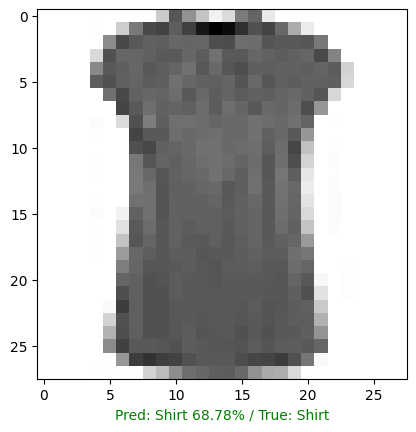

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(multiclass_model4, images = test_data_norm, true_labels = test_label, class_names = class_names)

# What patterns is our model learning?

In [ ]:
# Workings
print(multiclass_model4.input_shape)
multiclass_model4.summary()

(None, 28, 28)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden1 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,212 (94.58 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,142 (63.06 KB)

In [ ]:
print(multiclass_model4.name)
print(multiclass_model4.layers[1].name)

sequential_6
Hidden1


In [ ]:
# Workings
print(multiclass_model4.get_weights())
print(multiclass_model4.layers[2].get_weights())

[array([[-3.0243558e-01,  3.1250939e-01,  4.7876947e-02, ...,
        -9.8653090e-01,  5.9654248e-01, -2.4622396e-02],
       [ 8.9268871e-03,  5.2234000e-01, -6.1436929e-02, ...,
         3.4331018e-01, -7.8035265e-01, -4.1112740e-02],
       [-9.5404774e-01, -3.2998949e-01,  4.7568403e-02, ...,
         5.2964211e-01, -8.5490480e-02, -6.9274372e-01],
       ...,
       [-2.0071301e-04,  2.8870860e-01,  4.7457822e-02, ...,
        -3.7052533e-01,  3.4663481e-01, -3.7047032e-01],
       [ 6.4678192e-01, -1.3070862e-01,  5.3519554e-02, ...,
        -6.2760788e-01,  4.2585620e-01,  4.9806985e-01],
       [ 4.2156037e-02,  2.5375143e-01, -4.3623365e-02, ...,
        -3.7224203e-01,  6.3151658e-01,  3.7136514e-02]], dtype=float32), array([-0.46870992,  0.79295075, -0.01752087,  0.04277767,  0.2749638 ,
        0.79001856,  0.82898736,  0.31909165,  0.35269472,  0.5275965 ],
      dtype=float32), array([[ 0.5434112 ,  0.4036657 , -0.37693658,  0.46823955,  0.3500063 ,
         0.57131726,  

# Findiing the layers of our most recent model

In [ ]:
multiclass_model4.layers, type(multiclass_model4.layers) # It returns a tuple as seen below.

([<Flatten name=flatten_5, built=True>,
  <Dense name=Hidden1, built=True>,
  <Dense name=Hidden2, built=True>,
  <Dense name=Output, built=True>],
 list)

In [ ]:
# Extracting a particular layer
multiclass_model4.layers[1]

<Dense name=Hidden1, built=True>

In [ ]:
# Get the patterns of a layer in our network
weights, biases = multiclass_model4.layers[1].get_weights()
print(weights)
print(weights.shape)
# 784 * 10 = 7840 weights and 10 biases for 10 neurons in the first hidden layer adds upto 7850 trainable params
print(biases)
print(biases.shape)
# Biases are vectors

[[-3.0243558e-01  3.1250939e-01  4.7876947e-02 ... -9.8653090e-01
   5.9654248e-01 -2.4622396e-02]
 [ 8.9268871e-03  5.2234000e-01 -6.1436929e-02 ...  3.4331018e-01
  -7.8035265e-01 -4.1112740e-02]
 [-9.5404774e-01 -3.2998949e-01  4.7568403e-02 ...  5.2964211e-01
  -8.5490480e-02 -6.9274372e-01]
 ...
 [-2.0071301e-04  2.8870860e-01  4.7457822e-02 ... -3.7052533e-01
   3.4663481e-01 -3.7047032e-01]
 [ 6.4678192e-01 -1.3070862e-01  5.3519554e-02 ... -6.2760788e-01
   4.2585620e-01  4.9806985e-01]
 [ 4.2156037e-02  2.5375143e-01 -4.3623365e-02 ... -3.7224203e-01
   6.3151658e-01  3.7136514e-02]]
(784, 10)
[-0.46870992  0.79295075 -0.01752087  0.04277767  0.2749638   0.79001856
  0.82898736  0.31909165  0.35269472  0.5275965 ]
(10,)


Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector gets initialized as zeros (at least in the case of a TensorFlow Dense layer).

It allows (biases) the neural network's activation function to shift, giving the model more flexibility to fit complex patterns in the data.

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.